In [165]:
import glob
import math
import uproot
import numpy as np
import pandas as pd
import pkgutil
import uproot_methods

from importlib import reload
#syntax: fugi = reload(fugi)

import functions_giammi as fugi

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
%matplotlib inline
%config InlineBackend.figure_formats=["png"]

import re

import mplhep as hep
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.ndimage.filters import gaussian_filter
import itertools

from __future__ import division

plt.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

#loads the temperaure cmap like Philipp for both matpplotlib and plotly
cmap_temp, cmap_temp_go, Magma_r, Seismic_r = fugi.customcmaps()

#to see which classes have been defined so far
[modname for importer, modname, ispkg in pkgutil.walk_packages(uproot_methods.classes.__path__)]

# ##550eV - 11.5eV CH9
# #update nov Kilian binning (36,18)
# fileRCR = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_CH9_550eV_CR_Knov.root");en="550eV";CH="CH9";
# fileRCL = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_CH9_550eV_CL_Knov.root")
# fileSCR = uproot.open(r"../PYTHON_graphs/DATA/Experiments/S-C3H3F3O_CH9_550eV_CR_Knov.root")
# fileSCL = uproot.open(r"../PYTHON_graphs/DATA/Experiments/S-C3H3F3O_CH9_550eV_CL_Knov.root")

# #546eV - 8.2eV CH9
# fileRCR = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_546eV_CR_9600-3700ns_multiCH9.root");en="546eV";CH="CH9";
# fileRCL = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_546eV_CL_9600-3700ns_multiCH9.root")

# # 544eV - 6.1eV CH9
# fileRCR = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_544.5eV_CR_9600-3700ns_multiCH9.root");en="544eV";CH="CH9";
# fileRCL = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_544.5eV_CL_9600-3700ns_multiCH9.root")

# # 542eV - 4eV CH9
# fileRCR = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_542.5eV_CR_9600-3700ns_COMBI_multiCH9.root");en="542eV";CH="CH9";
# fileRCL = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_542.5eV_CL_9600-3700ns_COMBI_multiCH9.root")

#541eV 3eV CH9
fileRCR = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_541.5eV_CR_9600-3700ns_multiCH9.root");en="541eV";CH="CH9";
fileRCL = uproot.open(r"../PYTHON_graphs/DATA/Experiments/R-C3H3F3O_541.5eV_CL_9600-3700ns_multiCH9.root")

path = "angular_distr_el/"+CH+"/"

#move first the ID you need
IDs = ["ID_ALL_mol_e0_valid/EN_gate/","ID1_mol_e0_valid/EN_gate/","ID2_mol_e0_valid/EN_gate/","ID3_mol_e0_valid/EN_gate/", "ID4_mol_e0_valid/EN_gate/"]
dirs = ["MFPADs_multinew/","MFPADs_multinew_phi/"]

loc=path+IDs[0]+dirs[0]
ID=str(IDs[0]).split("_")[0]

noprint = True

#to alow the helicity comparison without the S enantiomer
if en != "550eV":
    fileSCR = None
    fileSCL = None

#new uproot4
# https://uproot.readthedocs.io/en/latest/basic.html
d=dict(fileRCR[loc].classnames()) # shows the type of each item
# k=fileRCR[loc].keys() #same as .classnames()
check = fileRCR[loc+"/MFPAD3D_engate_costheta_-1.00_phi_-180"]
d1=type(check)
check.all_members; #all members of the single histogram

gaussian=0.6

# Structure of values inside TH2D. MFPAD_xxx is a list

r_norm_nhistRCR = nhistRCR[0] / nhistRCR[0].sum(axis=1)[:,np.newaxis] # r values normalise to 1

phi_nhistRCR = nhistRCR[1][0][0] # phi

costheta_nhistRCR = nhistRCR[1][0][1] # cos(theta)

In [166]:
#Loading of the MFPADS and cos len = 27
MFPAD_RCR,ctheta_RCR,ctheta_RCR_err,cosphi_photon,MFPAD_axis,ctheta_axis,ctheta_axis_r=fugi.import_MFPAD(fileRCR, loc, full=True)
MFPAD_RCL,ctheta_RCL,ctheta_RCL_err=fugi.import_MFPAD(fileRCL, loc)
#projection of cos on x axis: len = 18
cosx_RCR=fugi.projection(MFPAD_RCR,alongaxis=0)
cosx_RCL=fugi.projection(MFPAD_RCL,alongaxis=0)

if fileSCL and fileSCR is not None:    
    MFPAD_SCR,ctheta_SCR,ctheta_SCR_err=fugi.import_MFPAD(fileSCR, loc)
    MFPAD_SCL,ctheta_SCL,ctheta_SCL_err=fugi.import_MFPAD(fileSCL, loc)
    #projection of cos on x axis
    cosx_SCR=fugi.projection(MFPAD_SCR,alongaxis=0)
    cosx_SCL=fugi.projection(MFPAD_SCL,alongaxis=0)


/home/giammi56/Documents/PYTHON_graphs/functions_giammi.py:337: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(cosphi_photon), np.array(xy_phicos_axisMFPAD), np.array(x_ctheta_axis,dtype=float), \


In [167]:
#COORDIANTES PHOTON ROTATION
#adjusting cosphi with a shifting to have it equal to theory
#before sorting it is natuarally cos sorted from experiment
fugi = reload(fugi)
cosphi_adj=[]

#from the cos(theta)_el: longer than MFPAD becuase one dimension less
ctheta_axis_red=ctheta_axis_r[0];

phiM=(MFPAD_axis[0][0][1:] + MFPAD_axis[0][0][:-1])/2
cosM=(MFPAD_axis[0][1][1:] + MFPAD_axis[0][1][:-1])/2

print("a. Electron coordinates")
print("MFPAD_xy shape = ", MFPAD_axis[0][0].shape)
print("phiM shape = ", phiM.shape)
print("cosM shape = ", cosM.shape)
print("\nctheta_axis_red = ", ctheta_axis_red[:6], "\n length ", len(ctheta_axis_red) )

print("\nb. Photon coordinates")
print("cosphi diagnostic: type=",type(cosphi_photon), " shape= ", cosphi_photon.shape)

cos_adj=fugi.shift_func(cosphi_photon[:,0]).tolist();
phi_adj=fugi.shift_func(cosphi_photon[:,1]).tolist();

for cos,phi in zip(cos_adj,phi_adj):
    cosphi_adj.append((cos,phi))
cosphi_adj=np.around(np.array(cosphi_adj),3)

print("cosphi_adj: type=",type(cosphi_adj), )
print("phi_adj length = ", len(phi_adj))
print("cos_adj length = ", len(cos_adj))

print("\n1. cosphi_adj  \n", cosphi_adj[:6], "\n")

# print(cosphi_adj[0][0])
#look to the values in b1 map and found the MFPAD

dfind=pd.DataFrame(cosphi_adj, columns=["ctheta","phi"])

#rearranging the photon vector
cosphi_adj_cos=(dfind.sort_values(by=["ctheta","phi"])).values
cosphi_adj_phi=(dfind.sort_values(by=["phi","ctheta"])).values

print("\n2. cosphi_adj_phi  \n", cosphi_adj_phi[:6], "\n")
print("\n3. cosphi_adj_cos  \n", cosphi_adj_cos[:6], "\n")

xgo_phi,ygo_phi = fugi.create_gocoords(a=0,cos_lin=True)
xgo_cos,ygo_cos = fugi.create_gocoords(a=1,cos_lin=True)

#there is no difference in unique between sortings
xgo_uniq=np.unique(np.array(xgo_cos))
ygo_uniq=np.unique(np.array(ygo_cos))

print("xgo_phi length = ", len(xgo_phi))
print("xgo_cos length = ", len(xgo_cos))
print("xgo_uniq = ", xgo_uniq[:6])
print("ygo_uniq = ", ygo_uniq[:6])

a. Electron coordinates
MFPAD_xy shape =  (37,)
phiM shape =  (36,)
cosM shape =  (18,)

ctheta_axis_red =  [-0.96296296 -0.88888889 -0.81481481 -0.74074074 -0.66666667 -0.59259259] 
 length  27

b. Photon coordinates
cosphi diagnostic: type= <class 'numpy.ndarray'>  shape=  (72, 2)
cosphi_adj: type= <class 'numpy.ndarray'>
phi_adj length =  72
cos_adj length =  72

1. cosphi_adj  
 [[  -0.835 -165.   ]
 [  -0.505 -165.   ]
 [  -0.165 -165.   ]
 [   0.165 -165.   ]
 [   0.495 -165.   ]
 [   0.835 -165.   ]] 


2. cosphi_adj_phi  
 [[  -0.835 -165.   ]
 [  -0.505 -165.   ]
 [  -0.165 -165.   ]
 [   0.165 -165.   ]
 [   0.495 -165.   ]
 [   0.835 -165.   ]] 


3. cosphi_adj_cos  
 [[  -0.835 -165.   ]
 [  -0.835 -135.   ]
 [  -0.835 -105.   ]
 [  -0.835  -75.   ]
 [  -0.835  -45.   ]
 [  -0.835  -15.   ]] 

STANDARD limits ph coord!
STANDARD limits ph coord!
xgo_phi length =  72
xgo_cos length =  72
xgo_uniq =  [-165. -135. -105.  -75.  -45.  -15.]
ygo_uniq =  [-0.835 -0.501 -0.167  0.16

#some diagnostic of the angles considered
#print(ctheta_xaxis_RCR, "\n")
#print(ctheta_cred, "\n")
print(phiM, "\n")
print(cosM, "\n")
print(cosphi_photon, "\n")
print(cosphi_adj)

#some diagnostic of y axis imported
print(np.array(ctheta_RCR).shape, "\n" ,ctheta_RCR, "\n")
print(np.array(ctheta_RCL).shape, "\n" ,ctheta_RCL, "\n")
print(ctheta_RCR[0].shape, "\n" ,ctheta_RCR[0], "\n")
print(ctheta_RCL[0].shape, "\n" ,ctheta_RCL[0])

In [168]:
# 1=phi_photon is constant from element 1, cos(theta)_photon scans
ctheta_RCR_cos=fugi.sorting_array(ctheta_RCR,theory=False,a=1)
ctheta_RCL_cos=fugi.sorting_array(ctheta_RCL,theory=False,a=1)
# 2=cos(theta)_photon is constant from element 1
ctheta_RCR_phi=fugi.sorting_array(ctheta_RCR,theory=False,a=2)
ctheta_RCL_phi=fugi.sorting_array(ctheta_RCL,theory=False,a=2)

#sorting respective errors
ctheta_RCR_cos_err=fugi.sorting_array(ctheta_RCR_err,theory=False,a=1)
ctheta_RCL_cos_err=fugi.sorting_array(ctheta_RCL_err,theory=False,a=1)
ctheta_RCR_phi_err=fugi.sorting_array(ctheta_RCR_err,theory=False,a=2)
ctheta_RCL_phi_err=fugi.sorting_array(ctheta_RCL_err,theory=False,a=2)

#normalise all quantities which goes into PECD
#NOTE: normalize the error is NOT correct. The fugi.error_calc uses NOT normalized errors!
ctheta_RCR_cos_norm=fugi.normalise_with_err(ctheta_RCR_cos,normtype=2)
ctheta_RCL_cos_norm=fugi.normalise_with_err(ctheta_RCL_cos,normtype=2)
ctheta_RCR_phi_norm=fugi.normalise_with_err(ctheta_RCR_phi,normtype=2)
ctheta_RCL_phi_norm=fugi.normalise_with_err(ctheta_RCL_phi,normtype=2)

if fileSCL and fileSCR is not None:
    ctheta_SCR_cos=fugi.sorting_array(ctheta_SCR,theory=False,a=1)
    ctheta_SCL_cos=fugi.sorting_array(ctheta_SCL,theory=False,a=1)
    ctheta_SCR_phi=fugi.sorting_array(ctheta_SCR,theory=False,a=2)
    ctheta_SCL_phi=fugi.sorting_array(ctheta_SCL,theory=False,a=2)

    ctheta_SCR_cos_err=fugi.sorting_array(ctheta_SCR_err,theory=False,a=1)
    ctheta_SCL_cos_err=fugi.sorting_array(ctheta_SCL_err,theory=False,a=1)
    ctheta_SCR_phi_err=fugi.sorting_array(ctheta_SCR_err,theory=False,a=2)
    ctheta_SCL_phi_err=fugi.sorting_array(ctheta_SCL_err,theory=False,a=2)

    ctheta_SCR_cos_norm=fugi.normalise_with_err(ctheta_SCR_cos,normtype=2)
    ctheta_SCL_cos_norm=fugi.normalise_with_err(ctheta_SCL_cos,normtype=2)
    ctheta_SCR_phi_norm=fugi.normalise_with_err(ctheta_SCR_phi,normtype=2)
    ctheta_SCL_phi_norm=fugi.normalise_with_err(ctheta_SCL_phi,normtype=2)

ctheta_RCR_phi == ctheta_RCR_cos

#test of similarity without sorting
cPECD_norm = np.divide(np.subtract(fugi.normalise_matrix(ctheta_RCR,normtype=1), fugi.normalise_matrix(ctheta_RCL,normtype=1)),np.add(fugi.normalise_matrix(ctheta_RCR,normtype=1),fugi.normalise_matrix(ctheta_RCL,normtype=1)))
cPECD_std =  np.divide(np.subtract(ctheta_RCR,ctheta_RCL),np.add(ctheta_RCR,ctheta_RCL))
errPECD_std = np.sqrt(1/(ctheta_RCR+ctheta_RCL))

In [169]:
if fileSCL and fileSCR is not None:
    #S enantiomer
    #////////////////////// cos /////////////////////////
    cPECD_norm_cos =  np.divide(np.subtract(ctheta_SCL_cos_norm,ctheta_SCR_cos_norm),np.add(ctheta_SCL_cos_norm,ctheta_SCR_cos_norm))
    cPECD_norm_cos_smooth = np.divide(np.subtract(gaussian_filter(ctheta_SCL_cos_norm,sigma=gaussian),gaussian_filter(ctheta_SCR_cos_norm,sigma=gaussian)),np.add(gaussian_filter(ctheta_SCL_cos_norm,sigma=gaussian),gaussian_filter(ctheta_SCR_cos_norm,sigma=gaussian)))

    cPECD_cos =  np.divide(np.subtract(ctheta_SCL_cos,ctheta_SCR_cos),np.add(ctheta_SCL_cos,ctheta_SCR_cos))

    #NOT normalized!
    errPECD_cos = fugi.error_calc(ctheta_SCL_cos,ctheta_SCR_cos,ctheta_SCL_cos_err,ctheta_SCR_cos_err)

    #////////////////////// phi /////////////////////////
    cPECD_norm_phi =  np.divide(np.subtract(ctheta_SCL_phi_norm,ctheta_SCR_phi_norm),np.add(ctheta_SCL_phi_norm,ctheta_SCR_phi_norm))
    cPECD_norm_phi_smooth = np.divide(np.subtract(gaussian_filter(ctheta_SCL_phi_norm,sigma=gaussian),gaussian_filter(ctheta_SCR_phi_norm,sigma=gaussian)),np.add(gaussian_filter(ctheta_SCL_phi_norm,sigma=gaussian),gaussian_filter(ctheta_SCR_phi_norm,sigma=gaussian)))

    cPECD_phi =  np.divide(np.subtract(ctheta_SCL_phi,ctheta_SCR_phi),np.add(ctheta_SCL_phi,ctheta_SCR_phi))

    #NOT normalized error!
    errPECD_phi = fugi.error_calc(ctheta_SCL_phi,ctheta_SCR_phi,ctheta_SCL_phi_err,ctheta_SCR_phi_err)

In [170]:
import functions_minuit as fumi
if fileSCL and fileSCR is not None:
    #iminuit withOUT error: NORMALIZED DATA
    
    # limits=[(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]
    
    fumi.iminuit_noerr(ctheta_axis_red,cPECD_norm_cos[0],limits)

In [171]:
#iminuit with error: NORMALIZED DATA
if fileSCL and fileSCR is not None:
    # limits=[(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

    m=fumi.iminuit_err(ctheta_axis_red,cPECD_norm_cos[0],errPECD_cos[0],limits)
    print(m)

In [172]:
if fileSCL and fileSCR is not None:
    #integrated in the function fumi.plotminuit
    from scipy.interpolate import make_interp_spline, BSpline
        
    x_data=ctheta_axis_red;y_data=cPECD_norm_cos[0]
    
    x_data_new = np.linspace(x_data.min(), x_data.max(), 300)
    bspl = make_interp_spline(x_data, fumi.PECD6(x_data, *m.values), k=5)
    
    plt.plot(x_data_new, bspl(x_data_new))
    plt.scatter(ctheta_axis_red,cPECD_norm_cos[0],color='r')
    plt.errorbar(ctheta_axis_red,cPECD_norm_cos[0], yerr=errPECD_cos[0], fmt="o")
    plt.xlabel('cos(theta)_photon')
    plt.ylabel('PECD')
    
    plt.show()
    for p in m.parameters:
        print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))

In [173]:
#S cos ordered modified with error
if fileSCL and fileSCR is not None:
    # param_matrix=np.zeros((6,72)) # alternative nparray initialization
    param_matrix_cos = [[0 for i in range(6)] for j in range(72)] #i col, j row
    
    # fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
    fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
    custom_xlim = (-1, 1)
    custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)
    
    # limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]
    
    for i,ax in enumerate(axes.ravel()): #for cos
        
        x_data = ctheta_axis_red;y_data = cPECD_norm_cos[i];y_err = errPECD_cos[i]
        #non sorted as test
        # x_data = ctheta_axis_red;y_data = cPECD_std[i];y_err = errPECD_std[i]
        
        m=fumi.iminuit_err(x_data,y_data,y_err,limits)
        fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)
    
        for counter,el in enumerate(m.parameters): # len = 6
            param_matrix_cos[i][counter]=((m.values[el], m.errors[el]))
    
    param_matrix_cos=np.array(param_matrix_cos) #numpy tranformation!!!
    
    fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_SCLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
        # for p in m.parameters:
        #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))

    if noprint:
        plt.close()
    else:
        plt.show()

#diagnostic parameter matrix
import pprint
pprint.pprint(param_matrix_phi)
print(len(m.parameters))
b1 = param_matrix_phi[:,0,0]
b2 = param_matrix_phi[:,1,0]
print(b1[0],b1.shape, b2[0], b2.shape)
plt.plot(param_matrix_phi[:,0,0])

#early test for the paramenters. Difference with the following graphs is the true scale
fig,axes = plt.subplots(1,6, figsize=(50, 7.5))
for i in range(6):
    #ax[0,1] = fig.add_subplot(1, 2, 1)
    axes[i].contourf(fugi.shift_func(cosphi_adj[:,1].reshape(12,6)) , fugi.shift_func(cosphi_adj[:,0].reshape(12,6)) , param_matrix_phi[:,i,0].reshape(12,6) , np.arange(-1., 1., .005) , extend='both', cmap=cmap_temp)
    #axes[i].contourf(shift_func(cosphi_adj[:,0].reshape(12,6)),shift_func(cosphi_adj[:,1].reshape(12,6)),param_matrix_phi[i,:,0].reshape(6,12).T)
plt.show()

In [174]:
if fileSCL and fileSCR is not None:
    fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    # cs=ax.pcolormesh(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,0,0].reshape(6,12),shading="gouraud",cmap=cmap_temp)
    cs,ax=fugi.plot_interpolation(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,0,0].reshape(6,12)*100, ax=ax, cmap=cmap_temp)

    ax.set_title("S CL-CR b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)

    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_SCLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [175]:
if fileSCL and fileSCR is not None:
    print("b1 max = ", np.max(param_matrix_cos[:,0,0]),"min = ", np.min(param_matrix_cos[:,0,0]))
    print("b2 max = ", np.max(param_matrix_cos[:,1,0]),"min = ",np.min(param_matrix_cos[:,1,0]))

In [176]:
if fileSCL and fileSCR is not None:
    fugi = reload(fugi)
    fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
    fig.suptitle("S CR-CL b1 map "+ID+" "+CH+" "+en)

    for ax,i in zip(axes,range(6)):
        cs,ax=fugi.plot_interpolation(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,i,0].reshape(6,12), ax=ax, cmap=cmap_temp, limits=limits)
        aspect=(xgo_uniq.max()/ygo_uniq.max())
        ax.set_ylabel('cos(\u03D1) [adm]')
        ax.set_aspect(aspect)
        cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
        cbar.ax.set_ylabel('asymmetry')
        if i==5:
            ax.set_xlabel('\u03D5 [DEG]')

    fig.tight_layout()

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_SCLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
    
    if noprint:
        plt.close()
    else:
        plt.show()

In [177]:
if fileSCL and fileSCR is not None:
    #S phi ordered modified with error
    # param_matrix=np.zeros((6,72)) # alternative nparray initialization
    param_matrix_phi = [[0 for i in range(6)] for j in range(72)] #i col, j row
    
    # fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
    fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
    custom_xlim = (-1, 1)
    custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)
    
    # limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]
    
    for i,ax in enumerate(np.flip(axes.T,axis=1).ravel()):
    # for i,ax in enumerate(axes.ravel()): #for cos
    
        x_data = ctheta_axis_red; y_data = cPECD_norm_phi_smooth[i];y_err = errPECD_phi[i]
        
        m=fumi.iminuit_err(x_data,y_data,y_err,limits)
        fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)
    
        for counter,el in enumerate(m.parameters): # len = 6
            param_matrix_phi[i][counter]=((m.values[el], m.errors[el]))
    
    param_matrix_phi=np.array(param_matrix_phi) #numpy tranformation!!!
    
    fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_SCLCR_phi_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False,    bbox_inches='tight')
        # for p in m.parameters:
        #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))
    
    if noprint:
        plt.close()
    else:
        plt.show()

In [178]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    # cs=ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6),   cmap=cmap_temp, shading="flat")
    cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6) *100, ax=ax, cmap=cmap_temp)
    
    ax.set_title("S CR-CL b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)
    
    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')
    
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_SCLCR_phi_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False,   bbox_inches='tight')

In [179]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs=ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6)*100,   cmap=cmap_temp, shading="flat")

    ax.set_title("S CR-CL b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_xticks(xgo_uniq); ax.xaxis.set_tick_params(rotation=-45)
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_yticks(ygo_uniq)
    ax.set_aspect(aspect)

    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_SCLCR_phi_smooth_RAW_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False,   bbox_inches='tight')

In [180]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
    fig.suptitle("S CR-CL b1 map "+ID+" "+CH+" "+en)
    for ax,i in zip(axes,range(6)):
    
        cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,i,0].reshape(12,6) , ax=ax, cmap=cmap_temp, limits=True)
        aspect=(xgo_uniq.max()/ygo_uniq.max())
        ax.set_ylabel('cos(\u03D1) [adm]')
        ax.set_aspect(aspect)
        cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
        cbar.ax.set_ylabel('')
        cbar.ax.set_ylabel('asymmetry')
    
        if i==5:
            ax.set_xlabel('\u03D5 [DEG]')
    
    fig.tight_layout()
    
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_SCLCR_phi_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False,     bbox_inches='tight')
    
    if noprint:
        plt.close()
    else:
        plt.show()

In [181]:
#////////////////////////////////////////////////////#
#                                                    #
#                   R enantiomer                     #
#                                                    #
#////////////////////// cos /////////////////////////#
cPECD_norm_cos =  np.divide(np.subtract(ctheta_RCL_cos_norm,ctheta_RCR_cos_norm),np.add(ctheta_RCL_cos_norm,ctheta_RCR_cos_norm))
cPECD_norm_cos_smooth = np.divide(np.subtract(gaussian_filter(ctheta_RCL_cos_norm,sigma=gaussian),gaussian_filter(ctheta_RCR_cos_norm,sigma=gaussian)),np.add(gaussian_filter(ctheta_RCL_cos_norm,sigma=gaussian),gaussian_filter(ctheta_RCR_cos_norm,sigma=gaussian)))

cPECD_cos =  np.divide(np.subtract(ctheta_RCL_cos,ctheta_RCR_cos),np.add(ctheta_RCL_cos,ctheta_RCR_cos))
errPECD_cos = fugi.error_calc(ctheta_RCL_cos,ctheta_RCR_cos) #NOT normed error!
# errPECD_cos = np.sqrt(1/(ctheta_RCR_cos+ctheta_RCL_cos))

cPECD_cos_smooth = np.divide(np.subtract(gaussian_filter(ctheta_RCL_cos,sigma=gaussian),gaussian_filter(ctheta_RCR_cos,sigma=gaussian)),np.add(gaussian_filter(ctheta_RCL_cos,sigma=gaussian),gaussian_filter(ctheta_RCR_cos,sigma=gaussian)))

#NOT nored error!
errPECD_cos_smooth = fugi.error_calc(ctheta_RCL_cos,ctheta_RCR_cos)

#////////////////////// phi /////////////////////////
cPECD_norm_phi =  np.divide(np.subtract(ctheta_RCL_phi_norm,ctheta_RCR_phi_norm),np.add(ctheta_RCL_phi_norm,ctheta_RCR_phi_norm))
cPECD_norm_phi_smooth = np.divide(np.subtract(gaussian_filter(ctheta_RCL_phi_norm,sigma=gaussian),gaussian_filter(ctheta_RCR_phi_norm,sigma=gaussian)),np.add(gaussian_filter(ctheta_RCL_phi_norm,sigma=gaussian),gaussian_filter(ctheta_RCR_phi_norm,sigma=gaussian)))

cPECD_phi =  np.divide(np.subtract(ctheta_RCL_phi,ctheta_RCR_phi),np.add(ctheta_RCL_phi,ctheta_RCR_phi))
errPECD_phi = fugi.error_calc(ctheta_RCL_phi,ctheta_RCR_phi) #NOT normed error!
# errPECD_phi = np.sqrt(1/(ctheta_SCR_phi+ctheta_SCL_phi))

cPECD_phi_smooth = np.divide(np.subtract(gaussian_filter(ctheta_RCL_phi,sigma=gaussian),gaussian_filter(ctheta_RCR_phi,sigma=gaussian)),np.add(gaussian_filter(ctheta_RCL_phi,sigma=gaussian),gaussian_filter(ctheta_RCR_phi,sigma=gaussian)))

#NOT nored error!
errPECD_phi_smooth = fugi.error_calc(ctheta_RCL_phi,ctheta_RCR_phi)

In [182]:
import functions_minuit as fumi
#iminuit with error
#NORMALIZED DATA

# limits=[(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]
limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

m=fumi.iminuit_err(ctheta_axis_red,cPECD_norm_phi_smooth[0],errPECD_phi[0],limits)
m

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 11.2                       │              Nfcn = 626              │
│ EDM = 0.000149 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b1   │  -0.052   │   0.020   │            │            │   -1    │    1    │       │
│ 1 │ b2   │   -1.0    │    2.2    │            │            │   -1    │    2    │       │
│ 2 │ b3   │  -0.003   │   0.035   │            │            │         │         │       │
│ 3 │ b4   │    1.8    │    0.7    │            │            │         │         │       │
│ 4 │ b5   │   0.065   │   0.033   │            │            │         │         │       │
│ 5 │ b6   │    1.1    │    1.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        b1        b2        b3        b4        b5        b6 │
├────┼─────────────────────────────────────────────────────────────┤
│ b1 │  0.000405  1.84e-05  0.000218   0.00744 -0.000188   0.00802 │
│ b2 │  1.84e-05  0.000812  4.19e-05  0.000902  4.49e-05 -6.39e-05 │
│ b3 │  0.000218  4.19e-05   0.00122    0.0233  0.000803    0.0336 │
│ b4 │   0.00744  0.000902    0.0233     0.512    0.0117     0.647 │
│ b5 │ -0.000188  4.49e-05  0.000803    0.0117   0.00107    0.0265 │
│ b6 │   0.00802 -6.39e-05    0.0336     0.647    0.0265      1.21 │
└────┴─────────────────────────────────────────────────────────────┘

In [183]:
#R cos ordered modified with error
# param_matrix=np.zeros((6,72)) # alternative nparray initialization
param_matrix_cos = [[0 for i in range(6)] for j in range(72)] #i col, j row

# fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
custom_xlim = (-1, 1)
custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)

# limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

# for i,ax in enumerate(np.flip(axes.T,axis=1).ravel()):
for i,ax in enumerate(axes.ravel()): #for cos
  
    x_data = ctheta_axis_red; y_data = cPECD_norm_cos_smooth[i];y_err = errPECD_cos[i]
    
    m=fumi.iminuit_err(x_data,y_data,y_err,limits)
    fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)

    for counter,el in enumerate(m.parameters): # len = 6
        param_matrix_cos[i][counter]=((m.values[el], m.errors[el]))

param_matrix_cos=np.array(param_matrix_cos) #numpy tranformation!!!

fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_RCLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
    # for p in m.parameters:
    #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))

if noprint:
    plt.close()
else:
    plt.show()

/home/giammi56/Documents/PYTHON_graphs/functions_giammi.py:583: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(wspace=wspace, hspace=hspace)


fugi = reload(fugi)
limits=[-0.2,0.2,0.025]
fig=fugi.plotgo_single(param_matrix_cos,xgo_cos,ygo_cos,name="b1map_R_CR-CL_cos_"+CH+"_"+en+"_exp",limits=limits)
fig.show()

print(len(param_matrix_cos[:,0,0].shape))
print(len(param_matrix_cos[:,0,0]))
print(len(xgo_uniq))
print(xgo_uniq.min())

In [184]:
print("b1 max = ", np.max(param_matrix_cos[:,0,0]),"min = ", np.min(param_matrix_cos[:,0,0]))
print("b2 max = ", np.max(param_matrix_cos[:,1,0]),"min = ", np.min(param_matrix_cos[:,1,0]))

b1 max =  0.09111695467095271 min =  -0.07246087047289995
b2 max =  1.9999937742636908 min =  -0.9999999115363325


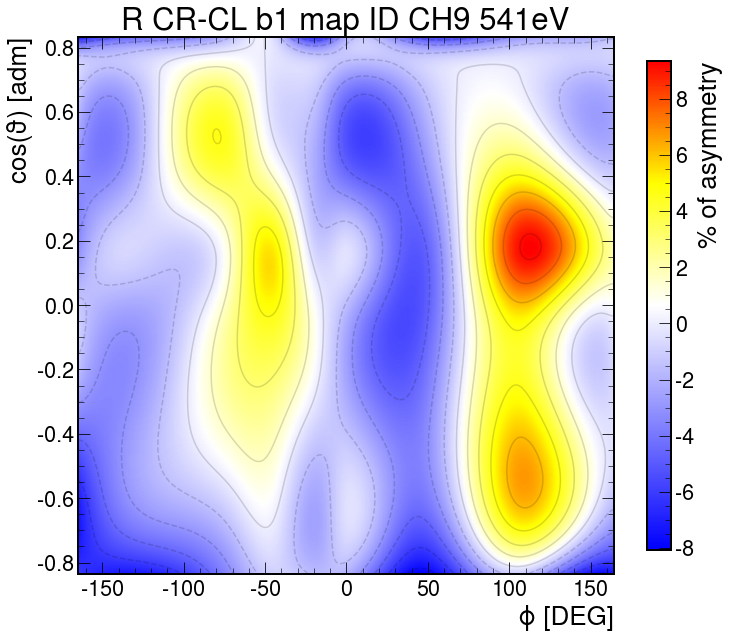

In [185]:
# fugi = reload(fugi)
fig,ax= plt.subplots(1, figsize=(12, 10))
# cs=ax.pcolormesh(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,0,0].reshape(6,12),shading="gouraud",cmap=cmap_temp)
cs,ax=fugi.plot_interpolation(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,0,0].reshape(6,12)*100, ax=ax, cmap=cmap_temp)

ax.set_title("R CR-CL b1 map "+ID+" "+CH+" "+en)
aspect=(xgo_uniq.max()/ygo_uniq.max())
ax.set_xlabel('\u03D5 [DEG]')
ax.set_ylabel('cos(\u03D1) [adm]')
ax.set_aspect(aspect)

# cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
# cbar.set_ticklabels(["min","max"])
# cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
cbar.ax.set_ylabel('% of asymmetry')

fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_RCLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

<ipython-input-186-fed71b3260bd>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = ax.pcolormesh(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,0,0].reshape(6,12)*100,cmap=cmap_temp, shading="flat")


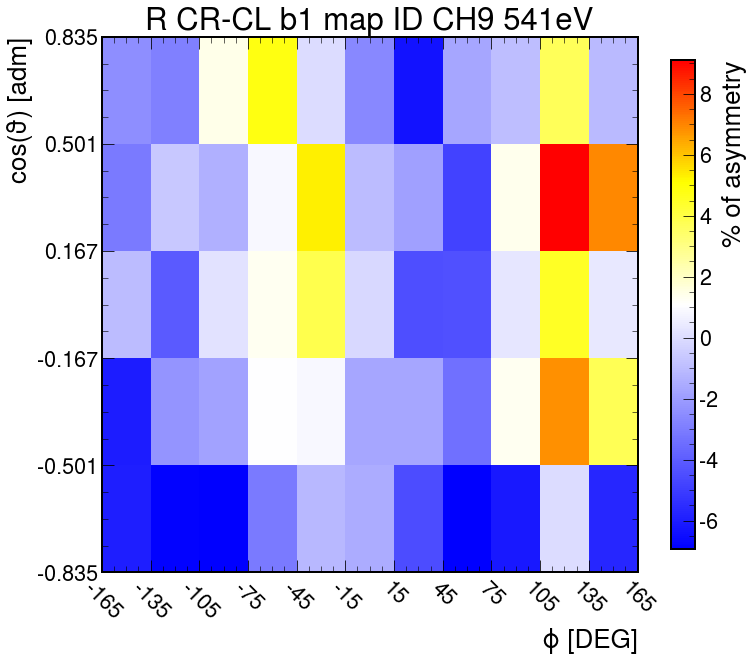

In [186]:
# fugi = reload(fugi)
fig,ax= plt.subplots(1, figsize=(12, 10))
cs = ax.pcolormesh(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,0,0].reshape(6,12)*100,cmap=cmap_temp, shading="flat")

ax.set_title("R CR-CL b1 map "+ID+" "+CH+" "+en)
aspect=(xgo_uniq.max()/ygo_uniq.max())
ax.set_xlabel('\u03D5 [DEG]')
ax.set_xticks(xgo_uniq); ax.xaxis.set_tick_params(rotation=-45)
ax.set_ylabel('cos(\u03D1) [adm]')
ax.set_yticks(ygo_uniq)
ax.set_aspect(aspect)

cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
cbar.ax.set_ylabel('% of asymmetry')

fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-b1map_RCLCR_cos_smooth_RAW_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [187]:
# fugi = reload(fugi)
fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
fig.suptitle("R CR-CL b1 map "+ID+" "+CH+" "+en)
for ax,i in zip(axes,range(6)):
    
    cs,ax=fugi.plot_interpolation(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos[:,i,0].reshape(6,12), ax=ax, cmap=cmap_temp, limits=limits)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    cbar.ax.set_ylabel('')
    cbar.ax.set_ylabel('asymmetry')

    if i==5:
        ax.set_xlabel('\u03D5 [DEG]')

fig.tight_layout()

fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_RCLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

if noprint:
    plt.close()
else:
    plt.show()

fugi = reload(fugi)
limits=[[-1,2,0.4],[-0.18,0.18,0.025]]
fig=fugi.plotgo_multiple(param_matrix_cos,xgo_cos,ygo_cos,name="b1-6map_R_CR-CL_cos_"+CH+"_"+en+"_exp",limits=limits)
fig.show()

In [188]:
#R phi ordered modified with error
# param_matrix=np.zeros((6,72)) # alternative nparray initialization
param_matrix_phi = [[0 for i in range(6)] for j in range(72)] #i col, j row

# fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
custom_xlim = (-1, 1)
custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)

# limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

for i,ax in enumerate(np.flip(axes.T,axis=1).ravel()):
# for i,ax in enumerate(axes.ravel()): #for cos
  
    x_data = ctheta_axis_red; y_data = cPECD_norm_phi_smooth[i];y_err = errPECD_phi[i]
    
    m=fumi.iminuit_err(x_data,y_data,y_err,limits)
    fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)

    for counter,el in enumerate(m.parameters): # len = 6
        param_matrix_phi[i][counter]=((m.values[el], m.errors[el]))

param_matrix_phi=np.array(param_matrix_phi) #numpy tranformation!!!

fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_RCLCR_phi_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
    # for p in m.parameters:
    #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))

if noprint:
    plt.close()
else:
    plt.show()

/home/giammi56/Documents/PYTHON_graphs/functions_giammi.py:583: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(wspace=wspace, hspace=hspace)


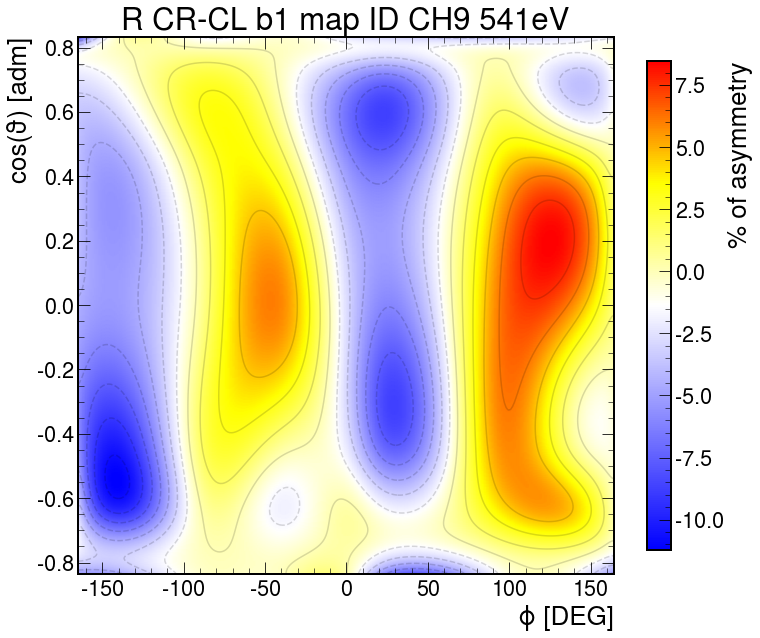

In [189]:
# fugi = reload(fugi)
fig,ax= plt.subplots(1, figsize=(12, 10))
# cs=ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6),cmap=cmap_temp, shading="flat")
cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6)*100, ax=ax, cmap=cmap_temp)

ax.set_title("R CR-CL b1 map "+ID+" "+CH+" "+en)
aspect=(xgo_uniq.max()/ygo_uniq.max())
ax.set_xlabel('\u03D5 [DEG]')
ax.set_ylabel('cos(\u03D1) [adm]')
ax.set_aspect(aspect)

# cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
# cbar.set_ticklabels(["min","max"])
# cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
cbar.ax.set_ylabel('% of asymmetry')

fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_RCLCR_phi_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

<ipython-input-190-e474dd92b4c7>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs=ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6)*100,cmap=cmap_temp, shading="flat")


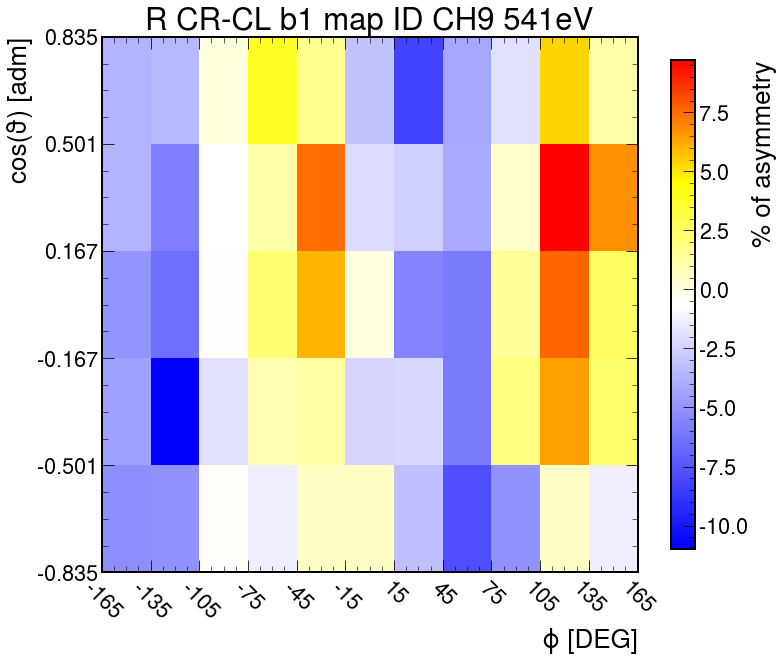

In [190]:
# fugi = reload(fugi)
fig,ax= plt.subplots(1, figsize=(12, 10))
cs=ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,0,0].reshape(12,6)*100,cmap=cmap_temp, shading="flat")

ax.set_title("R CR-CL b1 map "+ID+" "+CH+" "+en)
aspect=(xgo_uniq.max()/ygo_uniq.max())
ax.set_xlabel('\u03D5 [DEG]')
ax.set_xticks(xgo_uniq); ax.xaxis.set_tick_params(rotation=-45)
ax.set_ylabel('cos(\u03D1) [adm]')
ax.set_yticks(ygo_uniq)
ax.set_aspect(aspect)

cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
cbar.ax.set_ylabel('% of asymmetry')

fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-b1map_RCLCR_phi_smooth_RAW_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [191]:
# fugi = reload(fugi)
fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
fig.suptitle("R CR-CL b1 map "+ID+" "+CH+" "+en)
for ax,i in zip(axes,range(6)):

    cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi[:,i,0].reshape(12,6), ax=ax, cmap=cmap_temp, limits=True)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    cbar.ax.set_ylabel('')
    cbar.ax.set_ylabel('asymmetry')

    if i==5:
        ax.set_xlabel('\u03D5 [DEG]')

fig.tight_layout()

fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_RCLCR_phi_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

if noprint:
    plt.close()
else:
    plt.show()

In [192]:
ctheta_RCR_flip=[];ctheta_RCR_err_flip=[]
ctheta_RCL_flip=[];ctheta_RCL_err_flip=[]

for i in range(72):
    ctheta_RCR_flip.append(np.flip(ctheta_RCR[i]))
    ctheta_RCR_err_flip.append(np.flip(ctheta_RCR_err[i]))
    ctheta_RCL_flip.append(np.flip(ctheta_RCL[i]))
    ctheta_RCL_err_flip.append(np.flip(ctheta_RCL_err[i]))

ctheta_RCR_flip_cos=fugi.sorting_array(np.array(ctheta_RCR_flip),theory=False,a=1)
ctheta_RCL_flip_cos=fugi.sorting_array(np.array(ctheta_RCL_flip),theory=False,a=1)
ctheta_RCR_flip_phi=fugi.sorting_array(np.array(ctheta_RCR_flip),theory=False,a=2)
ctheta_RCL_flip_phi=fugi.sorting_array(np.array(ctheta_RCL_flip),theory=False,a=2)

ctheta_RCR_err_flip_cos=fugi.sorting_array(np.array(ctheta_RCR_err_flip),theory=False,a=1)
ctheta_RCL_err_flip_cos=fugi.sorting_array(np.array(ctheta_RCL_err_flip),theory=False,a=1)
ctheta_RCR_err_flip_phi=fugi.sorting_array(np.array(ctheta_RCR_err_flip),theory=False,a=2)
ctheta_RCL_err_flip_phi=fugi.sorting_array(np.array(ctheta_RCL_err_flip),theory=False,a=2)

ctheta_RCR_cos_norm_flip=fugi.normalise_with_err(ctheta_RCR_flip_cos,normtype=2)
ctheta_RCL_cos_norm_flip=fugi.normalise_with_err(ctheta_RCL_flip_cos,normtype=2)
ctheta_RCR_phi_norm_flip=fugi.normalise_with_err(ctheta_RCR_flip_phi,normtype=2)
ctheta_RCL_phi_norm_flip=fugi.normalise_with_err(ctheta_RCL_flip_phi,normtype=2)

ctheta_Rplus_cos=np.add(ctheta_RCL_cos_norm,ctheta_RCR_cos_norm_flip)
ctheta_Rplus_cos_justforerr=np.add(ctheta_RCL_cos,ctheta_RCR_flip_cos)

if fileSCL and fileSCR is not None:
    #R and S enantiomer summed and flipped: mark down to select single enantiomers
    #Flipping S
    ctheta_SCR_flip=[];ctheta_SCR_err_flip=[]
    ctheta_SCL_flip=[];ctheta_SCL_err_flip=[]
       
    for i in range(72):
        ctheta_SCR_flip.append(np.flip(ctheta_SCR[i]))
        ctheta_SCR_err_flip.append(np.flip(ctheta_SCR_err[i]))

        ctheta_SCL_flip.append(np.flip(ctheta_SCL[i]))
        ctheta_SCL_err_flip.append(np.flip(ctheta_SCL_err[i]))

    ctheta_SCR_flip_cos=fugi.sorting_array(np.array(ctheta_SCR_flip),theory=False,a=1)
    ctheta_SCL_flip_cos=fugi.sorting_array(np.array(ctheta_SCL_flip),theory=False,a=1)

    ctheta_SCR_flip_phi=fugi.sorting_array(np.array(ctheta_SCR_flip),theory=False,a=2)
    ctheta_SCL_flip_phi=fugi.sorting_array(np.array(ctheta_SCL_flip),theory=False,a=2)
    
    ctheta_SCR_err_flip_cos=fugi.sorting_array(np.array(ctheta_SCR_err_flip),theory=False,a=1)
    ctheta_SCL_err_flip_cos=fugi.sorting_array(np.array(ctheta_SCL_err_flip),theory=False,a=1)

    ctheta_SCR_err_flip_phi=fugi.sorting_array(np.array(ctheta_SCR_err_flip),theory=False,a=2)
    ctheta_SCL_err_flip_phi=fugi.sorting_array(np.array(ctheta_SCL_err_flip),theory=False,a=2)
    
    #normalise all quantities which goes into PECD
    ctheta_SCR_cos_norm_flip=fugi.normalise_with_err(ctheta_SCR_flip_cos,normtype=2)
    ctheta_SCL_cos_norm_flip=fugi.normalise_with_err(ctheta_SCL_flip_cos,normtype=2)
    ctheta_SCR_phi_norm_flip=fugi.normalise_with_err(ctheta_SCR_flip_phi,normtype=2)
    ctheta_SCL_phi_norm_flip=fugi.normalise_with_err(ctheta_SCL_flip_phi,normtype=2)

    #combination: I sum up helicities across enantiomers
    #////////////////////// cos /////////////////////////
    
    ctheta_Splus_cos=np.add(ctheta_SCL_cos_norm,ctheta_SCR_cos_norm_flip)
    ctheta_Splus_cos_justforerr=np.add(ctheta_SCL_cos,ctheta_SCR_flip_cos)

    #NO SMART SUM!
    cPECD_norm_cos_tot =  np.divide(np.subtract(ctheta_Rplus_cos,ctheta_Splus_cos),np.add(ctheta_Rplus_cos,ctheta_Splus_cos))
    cPECD_norm_cos_tot_smooth = np.divide(np.subtract(gaussian_filter(ctheta_Rplus_cos,sigma=gaussian),gaussian_filter(ctheta_Splus_cos,sigma=gaussian)),np.add(gaussian_filter(ctheta_Rplus_cos,sigma=gaussian),gaussian_filter(ctheta_Splus_cos,sigma=gaussian)))

    # NOT normed error!
    errPECD_cos_tot = fugi.error_calc(ctheta_Rplus_cos_justforerr,ctheta_Splus_cos_justforerr)

In [193]:
#smart flipping for the single 72 MFPAD image. Has to be in phi because of the structure of reshape, do the cos just as a check
temp_RCLCR=np.empty([12,6,27])
temp_totordered=np.empty([12,6,27])
temp_totordered1=np.empty([12,6,27]) #test on the sum of two enantiomers

#sum helicities: -cos(theta), phi+180 in photon coordiantes
for j in range(12):
    for i in range(6):
        if j>5:
            temp_RCLCR[j,i]=np.add(ctheta_RCL_phi.reshape(12,6,-1)[j,i],ctheta_RCR_flip_phi.reshape(12,6,-1)[j-6,5-i])
        else:
            temp_RCLCR[j,i]=np.add(ctheta_RCL_phi.reshape(12,6,-1)[j,i],ctheta_RCR_flip_phi.reshape(12,6,-1)[6+j,5-i])

ctheta_Rplus_phi=np.array(temp_RCLCR).reshape(72,-1)
ctheta_Rplus_phi_norm=fugi.normalise_with_err(ctheta_Rplus_phi,normtype=2)

if fileSCL and fileSCR is not None:
    temp_SCLCR=np.empty([12,6,27])
    temp_SCLCR_err=np.empty([12,6,27])
    #sum helicities: -cos(theta), phi+180 in photon coordiantes
    for j in range(12):
        for i in range(6):
            if j>5:
                temp_SCLCR[j,i]=np.add(ctheta_SCL_phi.reshape(12,6,-1)[j,i],ctheta_SCR_flip_phi.reshape(12,6,-1)[j-6,5-i])
            else:
                temp_SCLCR[j,i]=np.add(ctheta_SCL_phi.reshape(12,6,-1)[j,i],ctheta_SCR_flip_phi.reshape(12,6,-1)[6+j,5-i])
    
    ctheta_Splus_phi=np.array(temp_SCLCR).reshape(72,-1)
    ctheta_Splus_phi_norm=fugi.normalise_with_err(ctheta_Splus_phi,normtype=2)

    #SMART SUM!
    cPECD_norm_phi_tot =  np.divide(np.subtract(ctheta_Rplus_phi_norm,ctheta_Splus_phi_norm),np.add(ctheta_Rplus_phi_norm,ctheta_Splus_phi_norm))

    cPECD_norm_phi_tot_smooth = np.divide(np.subtract(gaussian_filter(ctheta_Rplus_phi_norm,sigma=gaussian),gaussian_filter(ctheta_Splus_phi_norm,sigma=gaussian)),np.add(gaussian_filter(ctheta_Rplus_phi_norm,sigma=gaussian),gaussian_filter(ctheta_Splus_phi_norm,sigma=gaussian)))

    #NOT nored error!
    errPECD_phi_tot = fugi.error_calc(ctheta_Rplus_phi,ctheta_Splus_phi)

In [194]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    ###### R S combined SMART SUM  #####
    
    # param_matrix=np.zeros((6,72)) # alternative nparray initialization
    param_matrix_phi_tot = [[0 for i in range(6)] for j in range(72)] #i col, j row
    
    # fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
    fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
    custom_xlim = (-1, 1)
    custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)
    
    # limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

    for i,ax in enumerate(np.flip(axes.T,axis=1).ravel()):
        
        x_data = ctheta_axis_red; y_data = cPECD_norm_phi_tot[i];y_err = errPECD_phi_tot[i]
        
        m=fumi.iminuit_err(x_data,y_data,y_err,limits)
        fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)
    
        for counter,el in enumerate(m.parameters): # len = 6
            param_matrix_phi_tot[i][counter]=((m.values[el], m.errors[el]))
    
    param_matrix_phi_tot=np.array(param_matrix_phi_tot) #numpy tranformation!!!
    
    fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_R-S_CLCR_phi_smart_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
        # for p in m.parameters:
        #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))
    if noprint:
        plt.close()
    else:
        plt.show()

In [195]:
#smart SUM
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi_tot[:,0,0].reshape(12,6)*100, ax=ax, cmap=cmap_temp)

    ax.set_title("R - S b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)

    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-S_CLCR_phi_smart_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

#smart SUM
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs = ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi_tot[:,0,0].reshape(12,6)*100,cmap=cmap_temp, shading="flat")

    ax.set_title("R - S b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_xticks(xgo_uniq)
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_yticks(ygo_uniq)
    ax.set_aspect(aspect)

    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-S_CLCR_phi_smart_RAW_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [196]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
    fig.suptitle("R - S b1 map "+ID+" "+CH+" "+en)
    for ax,i in zip(axes,range(6)):

        cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi_tot[:,i,0].reshape(12,6), ax=ax, cmap=cmap_temp, limits=True)
        aspect=(xgo_uniq.max()/ygo_uniq.max())
        ax.set_ylabel('cos(\u03D1) [adm]')
        ax.set_aspect(aspect)
        cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
        cbar.ax.set_ylabel('asymmetry')
        if i==5:
            ax.set_xlabel('\u03D5 [DEG]')

    fig.tight_layout()

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_R-S_CLCR_phi_smart_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

    if noprint:
        plt.close()
    else:
        plt.show()

In [197]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    ###### R S combined SMART SUM  #####
    
    # param_matrix=np.zeros((6,72)) # alternative nparray initialization
    param_matrix_phi_tot = [[0 for i in range(6)] for j in range(72)] #i col, j row
    
    # fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
    fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
    custom_xlim = (-1, 1)
    custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)
    
    # limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

    for i,ax in enumerate(np.flip(axes.T,axis=1).ravel()):
        
        x_data = ctheta_axis_red; y_data = cPECD_norm_phi_tot_smooth[i];y_err = errPECD_phi_tot[i]
        
        m=fumi.iminuit_err(x_data,y_data,y_err,limits)
        fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)
    
        for counter,el in enumerate(m.parameters): # len = 6
            param_matrix_phi_tot[i][counter]=((m.values[el], m.errors[el]))
    
    param_matrix_phi_tot=np.array(param_matrix_phi_tot) #numpy tranformation!!!
    
    fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_R-S_CLCR_phi_smart_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
        # for p in m.parameters:
        #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))
    
    if noprint:
        plt.close()
    else:
        plt.show()

In [198]:
#smart SUM
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi_tot[:,0,0].reshape(12,6)*100, ax=ax, cmap=cmap_temp)

    ax.set_title("R - S b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)

    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-S_CLCR_phi_smart_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [199]:
xgo_uniq

array([-165., -135., -105.,  -75.,  -45.,  -15.,   15.,   45.,   75.,
        105.,  135.,  165.])

In [200]:
#smart SUM
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs = ax.pcolormesh(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi_tot[:,0,0].reshape(12,6)*100,cmap=cmap_temp, shading="flat")

    ax.set_title("R - S b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_xticks(xgo_uniq)
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_yticks(ygo_uniq)
    ax.set_aspect(aspect)

    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-S_CLCR_phi_smart_smooth_RAW_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [201]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
    fig.suptitle("R - S b1 map "+ID+" "+CH+" "+en)
    for ax,i in zip(axes,range(6)):
        cs,ax=fugi.plot_interpolation(np.array(xgo_phi).reshape(12,6),np.array(ygo_phi).reshape(12,6),param_matrix_phi_tot[:,i,0].reshape(12,6), ax=ax, cmap=cmap_temp, limits=True)
        aspect=(xgo_uniq.max()/ygo_uniq.max())
        ax.set_ylabel('cos(\u03D1) [adm]')
        ax.set_aspect(aspect)
        cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
        cbar.ax.set_ylabel('asymmetry')
        if i==5:
            ax.set_xlabel('\u03D5 [DEG]')

    fig.tight_layout()

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_R-S_CLCR_phi_smart_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

    if noprint:
        plt.close()
    else:
        plt.show()

In [202]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    # fumi = reload(fumi)

    # ////////////////////////// #
    # R S combined NON SMART SUM #
    # ////////////////////////// #

    # param_matrix=np.zeros((6,72)) # alternative nparray initialization
    param_matrix_cos_tot = [[0 for i in range(6)] for j in range(72)] #i col, j row
    
    # fig, axes = plt.subplots(6,12, figsize=(50, 24), constrained_layout=True, sharex=True , sharey=True)
    fig, axes = plt.subplots(6,12, figsize=(25, 12), constrained_layout=True, sharex=True , sharey=True)
    custom_xlim = (-1, 1)
    custom_ylim = (-0.2,0.2) #custom_ylim = (-1,1)
    
    # limits=[(-1, 1), (-1, 2), (None, None), (-1, 2), (None, None), (-1, 2)]
    limits=[(-1, 1), (-1, 2), (None, None), (None, None), (None, None), (None, None)]

    for i,ax in enumerate(axes.ravel()):
        
        x_data = ctheta_axis_red; y_data = cPECD_norm_cos_tot_smooth[i];y_err = errPECD_cos_tot[i]
        
        m=fumi.iminuit_err(x_data,y_data,y_err,limits)
        fumi.plotminuit(x_data,y_data,y_err,m,ax,custom_xlim,custom_ylim)
    
        for counter,el in enumerate(m.parameters): # len = 6
            param_matrix_cos_tot[i][counter]=((m.values[el], m.errors[el]))
    
    param_matrix_cos_tot=np.array(param_matrix_cos_tot) #numpy tranformation!!!
    
    fugi.overlaygraph(fig,wspace=0.08, hspace=0.08)
    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1matrix_R-S_CLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')
        # for p in m.parameters:
        #     print("{} = {:2.3e} +/- {:2.3e}".format(p, m.values[p], m.errors[p]))

    if noprint:
        plt.close()
    else:
        plt.show()

In [203]:
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs,ax=fugi.plot_interpolation(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos_tot[:,0,0].reshape(6,12)*100, ax=ax, cmap=cmap_temp)

    ax.set_title("R - S b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_aspect(aspect)

    # cbar = fugi.clippedcolorbar(cs,shrink=0.9, ax=cs)
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    # cbar.set_ticklabels(["min","max"])
    # cbar.set_ticks([totMFPAD.min(),totMFPAD.max()])
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-S_CLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [204]:
#smart SUM
if fileSCL and fileSCR is not None:
    # fugi = reload(fugi)
    fig,ax= plt.subplots(1, figsize=(12, 10))
    cs = ax.pcolormesh(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos_tot[:,0,0].reshape(6,12)*100,cmap=cmap_temp, shading="flat")

    ax.set_title("R - S b1 map "+ID+" "+CH+" "+en)
    aspect=(xgo_uniq.max()/ygo_uniq.max())
    ax.set_xlabel('\u03D5 [DEG]')
    ax.set_xticks(xgo_uniq); ax.xaxis.set_tick_params(rotation=-45)
    ax.set_ylabel('cos(\u03D1) [adm]')
    ax.set_yticks(ygo_uniq)
    ax.set_aspect(aspect)
    
    cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
    cbar.ax.set_ylabel('% of asymmetry')

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1map_R-S_CLCR_cos_smooth_RAW_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

In [205]:
if fileSCL and fileSCR is not None:
    fugi = reload(fugi)
    fig,axes= plt.subplots(6,1, figsize=(10, 40), sharex=True)
    fig.suptitle("R - S b1 map "+ID+" "+CH+" "+en)
    for ax,i in zip(axes,range(6)):

        cs,ax=fugi.plot_interpolation(np.array(xgo_cos).reshape(6,12),np.array(ygo_cos).reshape(6,12),param_matrix_cos_tot[:,i,0].reshape(6,12), ax=ax, cmap=cmap_temp, limits=limits)

        aspect=(xgo_uniq.max()/ygo_uniq.max())
        ax.set_ylabel('cos(\u03D1) [adm]')
        ax.set_aspect(aspect)
        cbar = fig.colorbar(cs,shrink=0.9, ax=ax)
        cbar.ax.set_ylabel('asymmetry')
        if i==5:
            ax.set_xlabel('\u03D5 [DEG]')

    fig.tight_layout()

    fig.savefig("../PYTHON_graphs/OUTPUTS/TFMOX/b1-6map_R-S_CLCR_cos_smooth_"+CH+"_"+ID+"_"+en+"_exp.png", dpi=300, transparent=False, bbox_inches='tight')

    if noprint:
        plt.close()
    else:
        plt.show()